In [38]:
import tensorflow as tf 
import numpy as np 
import tensorflow as tf
import skimage.io as io
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline

In [30]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

In [31]:
%matplotlib inline
def read_and_decode(filename_queue):
    reader = tf.TFRecordReader()
    _ , serialized_example = reader.read(filename_queue)
    features = tf.parse_single_example(serialized_example,
      # Defaults are not specified since both keys are required.
      features={
        'height': tf.FixedLenFeature([], tf.int64),
        'width': tf.FixedLenFeature([], tf.int64),
        'image_raw': tf.FixedLenFeature([], tf.string)
        })
    image = tf.decode_raw(features['image_raw'], tf.uint8)
    height= tf.cast(features['height'] , tf.int32)
    width = tf.cast(features['width'] , tf.int32)
    image_shape = tf.pack([height , width , 3 ]) 
    image_size_const = tf.constant((IMAGE_HEIGHT , IMAGE_WIDTH , 3) , dtype = tf.int32)
    image=tf.reshape(image ,  image_shape)
    image = tf.image.resize_image_with_crop_or_pad(image=image,
                                           target_height=IMAGE_HEIGHT,
                                           target_width=IMAGE_WIDTH)
    images = tf.train.shuffle_batch([image] , batch_size =2 , capacity =30 ,num_threads=3 , min_after_dequeue=10)
    return images 


In [32]:
tfrecords_filename = './sample_image.tfrecords'

print tfrecords_filename
filename_queue = tf.train.string_input_producer([tfrecords_filename] , num_epochs=10)
reader = tf.TFRecordReader()
_ , serialized_example = reader.read(filename_queue)


images = read_and_decode(filename_queue)

./sample_image.tfrecords


In [33]:
init_op =tf.group(tf.global_variables_initializer() , 
                 tf.local_variables_initializer())
sess=tf.Session()  
sess.run(init_op)
coord=tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess = sess , coord = coord)
img_list=[]
for i in xrange(11):
    img=sess.run(images)
    img_list.append(img)
    print (imgs.shape)
    print ('current batch')
    
coord.request_stop()
coord.join(threads)

(2, 224, 224, 3)
current batch
(2, 224, 224, 3)
current batch
(2, 224, 224, 3)
current batch
(2, 224, 224, 3)
current batch
(2, 224, 224, 3)
current batch
(2, 224, 224, 3)
current batch
(2, 224, 224, 3)
current batch
(2, 224, 224, 3)
current batch
(2, 224, 224, 3)
current batch
(2, 224, 224, 3)
current batch
(2, 224, 224, 3)
current batch


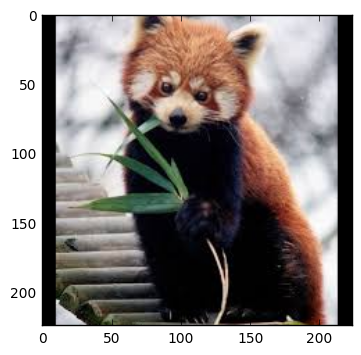

In [36]:
plt.imshow(img_list[0][0])

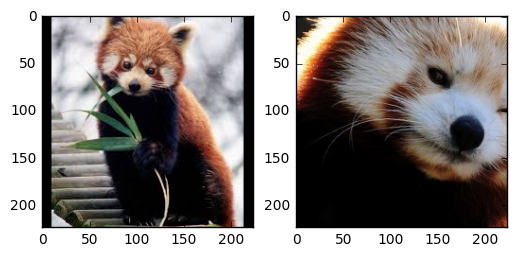

In [41]:
fig = plt.figure()
a = fig.add_subplot(1,2,1)
img1= img_list[0][0]
plt.imshow(img1)
a = fig.add_subplot(1,2,2)
img2= img_list[0][1]
plt.imshow(img2)
#img = mpimg.imread('..')


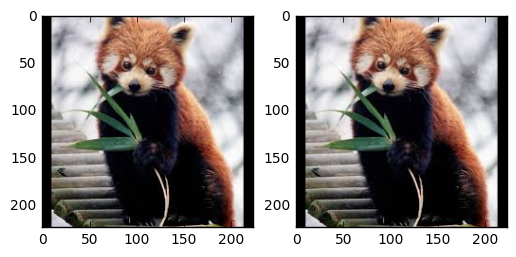

In [42]:
fig = plt.figure()
a = fig.add_subplot(1,2,1)
img1= img_list[1][0]
plt.imshow(img1)
a = fig.add_subplot(1,2,2)
img2= img_list[1][1]
plt.imshow(img2)
#img = mpimg.imread('..')

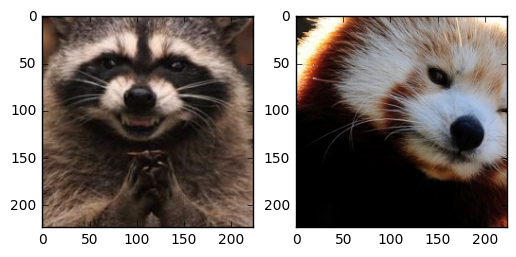

In [43]:
fig = plt.figure()
a = fig.add_subplot(1,2,1)
img1= img_list[2][0]
plt.imshow(img1)
a = fig.add_subplot(1,2,2)
img2= img_list[2][1]
plt.imshow(img2)
#img = mpimg.imread('..')

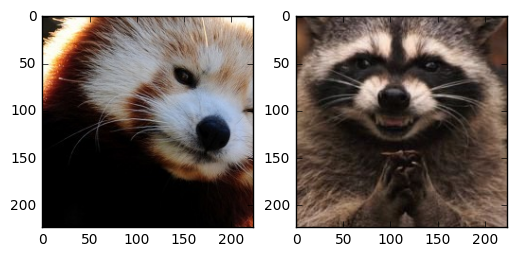

In [44]:
fig = plt.figure()
a = fig.add_subplot(1,2,1)
img1= img_list[3][0]
plt.imshow(img1)
a = fig.add_subplot(1,2,2)
img2= img_list[3][1]
plt.imshow(img2)
#img = mpimg.imread('..')